In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os.path
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from Image_reading import *
from Color_descriptors import *
from Shape_descriptors import concatShapeFeatures
from Texture_descriptors import lbp

In [45]:
categories = scipy.io.loadmat("imagelabels.mat")['labels'][0,:]
index_list = []
n_categories = 20 
n_img = 30
for i in range(n_categories):
    index_list = index_list + list(np.where(categories==i+1)[0])[:n_img]
index_list = np.array(index_list)
print(categories[index_list])

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11

In [49]:
#   Parameters defintion:
color_space='hsv'
bins_hist=[4,4,4]
bins_corr=[2,2,2]
distances=[1,4]
n_fft = 64
hist_size_lbp=100

#     First, we regroup the images features in a single 2D-Array where each line is the feature vector of the image
X_all=[]
for i in range(index_list.shape[0]):
    X_all.append([])

j = -1 
for i in index_list:
    j+= 1
    X=read_image_4(i+1)
    # ********************************************************* 
    # ********************color_features***********************
    # *********************************************************
    # Color_histogram:
    hist= color_histogram(X,color_space,bins_hist)
    X_all[j]=X_all[j]+[hist]
    # Color_moments:
    moments_ftr=moments_calcul(X,color_space)
    X_all[j]=X_all[j]+[moments_ftr]
    # Color_correlogram:
    nx=X.shape[0]
    ny=X.shape[1]
    m=30
    r = m / ny
    dim = (m, int(nx * r))
    X_resized = cv.resize(X, dim, interpolation = cv.INTER_AREA)
    corr= color_correlogram(X_resized,color_space,bins_corr,distances)
    X_all[j]=X_all[j]+[corr]

    # *********************************************************
    # ********************Shape_features***********************
    # *********************************************************
    shape_ftr=concatShapeFeatures(X,n_fft)
    X_all[j]=X_all[j]+[shape_ftr]

    # *********************************************************
    # ********************Texture_features*********************
    # *********************************************************
    lbp_feature=lbp(X,hist_size_lbp)
    X_all[j]=X_all[j]+[lbp_feature]

    X_all[j]=np.concatenate(X_all[j])
    if j in [10,50,100,200,300,400,500]:
        print(j)
#         print(i)

X_all=np.array(X_all).astype(float)
print("Number of categories= "+ str(n_categories))
print("Number of images= "+ str(X_all.shape[0]))
print("Number of features= "+ str(X_all.shape[1]))
print("\n")


Number of categories= 20
Number of images= 600
Number of features= 297




In [50]:
np.save(os.path.join(os.path.abspath("résultats (2ème base)"),"Features_matrix_2(not_scaled).npy"), X_all)

In [51]:
# *********************Normalization**********************
X = StandardScaler().fit_transform(X_all)

In [52]:
np.save(os.path.join(os.path.abspath("résultats (2ème base)"),"Features_matrix_2(scaled).npy"), X)

In [3]:
X = np.load(os.path.join(os.path.abspath("résultats (2ème base)"),"Features_matrix_2(scaled).npy"))

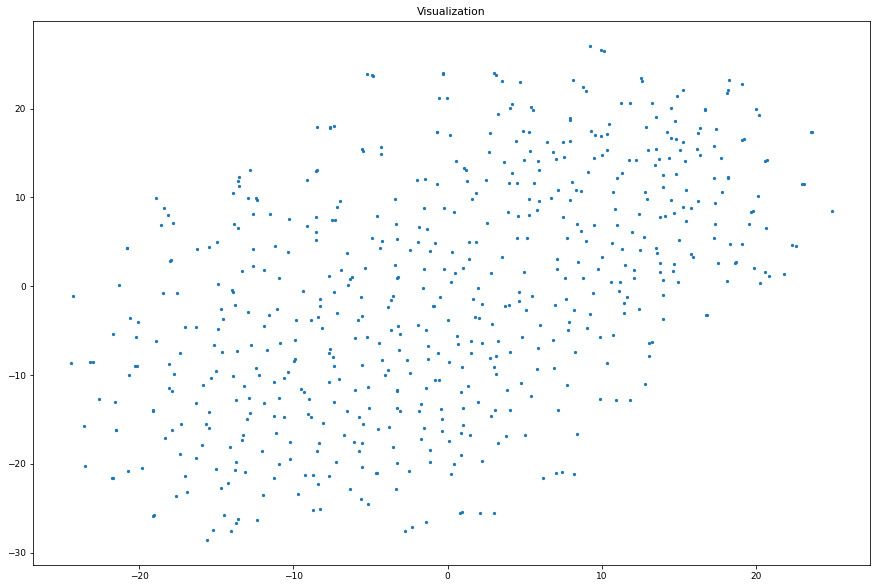

In [53]:
# *********************Visualization**********************
X_embedded = TSNE(n_components=2).fit_transform(X)

plt.figure(figsize=(15,10))
plt.scatter(X_embedded[:,0],X_embedded[:,1], s=5)
plt.title("Visualization")
plt.show()